In [11]:
import sys
sys.path.append("..")
from importlib import reload
import helper_visa as vs
import time
import joblib
from pylab import *
reload(vs)


<module 'helper_visa' from '/home/mathusla/tofpet/Mu-Hardware/Keysight/../helper_visa.py'>

# Step 1: connect to the scope
- If you don't know the address, do vs.connect()
- Otherwise, put the address in the argument will speed it up

In [5]:
scope = vs.connect(address = "USB0::0x2A8D::0x9008::MY63160110::0::INSTR", timeout=30_000) # set 30 second

Connected to VISA [USB0::0x2A8D::0x9008::MY63160110::0::INSTR]:  KEYSIGHT TECHNOLOGIES,EXR054A,MY63160110,11.50.00201



# Example 1: read the current waveform from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

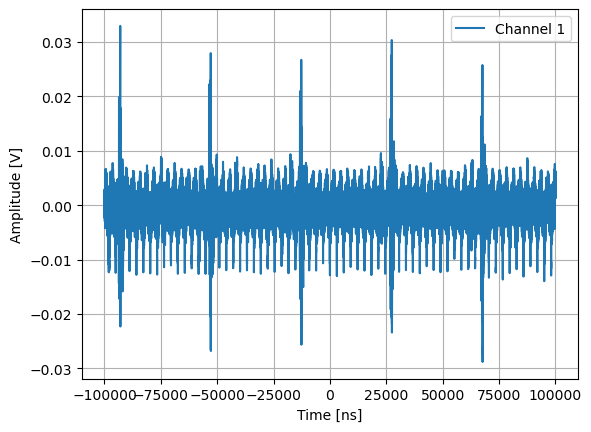

In [112]:
trigger_channel = 1
read_channel = [1]
acquire_length = 800_000

data,time_series=vs.read_waveform(scope, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True, initialize = True, calibration_data=None)

for ch in data:
    plot(time_series*1e9, data[ch], label=f"Channel {ch}")

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
legend()
grid()

# Example 2: repetitively read multiple waveforms from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

In [113]:
reload(vs)

<module 'helper_visa' from '/home/mathusla/tofpet/Mu-Hardware/Keysight/../helper_visa.py'>

In [182]:
data_save = vs.get_events(scope, Nevents = 100, print_every_n = 10, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
time_series = data_save["metadata"]["time_series"]*1e9
fs = 1e9/(time_series[1]-time_series[0])


# joblib.dump(data_save, "scope_waveform_save_example.joblib",compress =False)

10/100 events acquired, time elapsed 1.5 s, time from last print 1.5 s
20/100 events acquired, time elapsed 2.9 s, time from last print 1.4 s
30/100 events acquired, time elapsed 4.3 s, time from last print 1.4 s
40/100 events acquired, time elapsed 5.7 s, time from last print 1.4 s
50/100 events acquired, time elapsed 7.2 s, time from last print 1.4 s
60/100 events acquired, time elapsed 8.6 s, time from last print 1.4 s
70/100 events acquired, time elapsed 10.1 s, time from last print 1.5 s
80/100 events acquired, time elapsed 11.5 s, time from last print 1.4 s
90/100 events acquired, time elapsed 13.0 s, time from last print 1.4 s
100/100 events acquired, time elapsed 14.4 s, time from last print 1.4 s


In [183]:
freq,pxx = scipy.signal.periodogram(np.array(data_save[1]), axis=1, fs=fs)
noise_psd_v = np.sqrt(np.mean(pxx, axis=0))
psd_save = {"freq":freq, "psd":noise_psd_v}
joblib.dump(psd_save,"data_waveform/psd_DCRC_COM_no_flat_shield_50.joblib")

['data_waveform/psd_DCRC_COM_no_flat_shield_50.joblib']

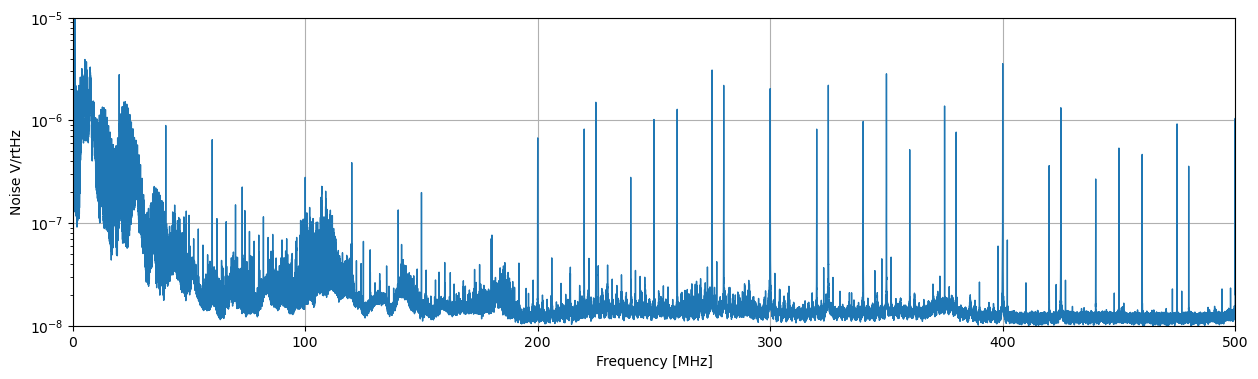

In [184]:
figure(figsize=(15,4))
plot(freq/1e6,noise_psd_v,linewidth=1)
xlim(0,500)
ylim(top=1e-5)
ylim(1e-8,)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise V/rtHz")
grid()

9.068876e-09
8.910695e-09


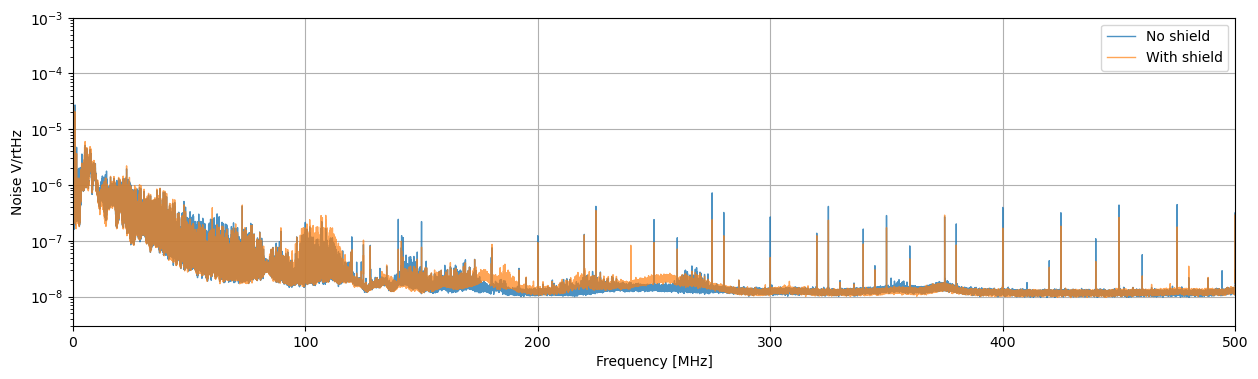

In [176]:
figure(figsize=(15,4))

psd_save = joblib.load("data_waveform/psd_DCRC_COM_no_vert_shield_50.joblib")
plot(psd_save["freq"]/1e6,psd_save["psd"],linewidth=1,alpha=0.8,label="No shield")
print(np.sum(psd_save["psd"][1:]**2))
power_1 = psd_save["psd"]
power_cumsum_1 = np.cumsum(psd_save["psd"][1:][::-1]**2)[::-1]

psd_save = joblib.load("data_waveform/psd_DCRC_COM_with_vert_shield_50-v1.joblib")
plot(psd_save["freq"]/1e6,psd_save["psd"],linewidth=1,alpha=0.7,label="With shield")
print(np.sum(psd_save["psd"][1:]**2))
power_2 = psd_save["psd"]
power_cumsum_2 = np.cumsum(psd_save["psd"][1:][::-1]**2)[::-1]




xlim(0,500)
ylim(top=1e-3)
ylim(3e-9,)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise V/rtHz")
grid()
legend()

4.4355675e-09
2.075828e-09


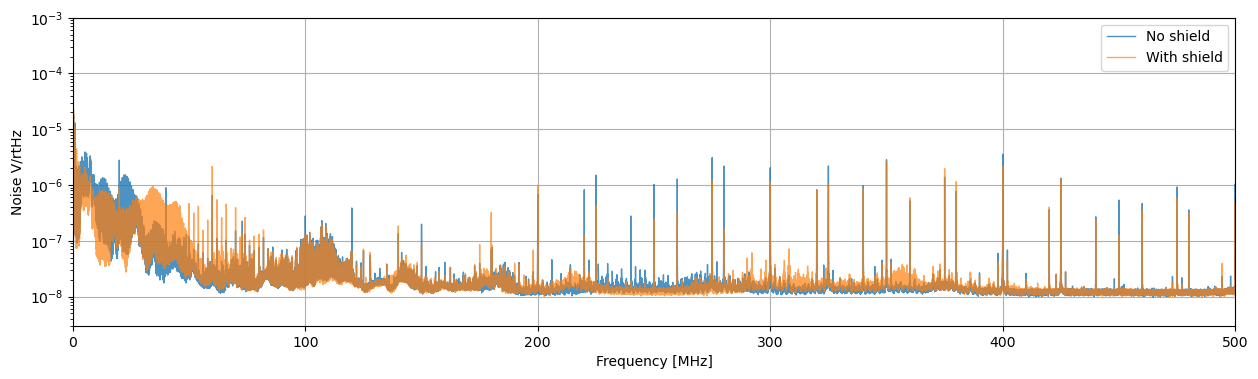

In [189]:
figure(figsize=(15,4))

psd_save = joblib.load("data_waveform/psd_DCRC_COM_no_flat_shield_50.joblib")
plot(psd_save["freq"]/1e6,psd_save["psd"],linewidth=1,alpha=0.8,label="No shield")
print(np.sum(psd_save["psd"][1:]**2))
power_1 = psd_save["psd"]
power_cumsum_1 = np.cumsum(psd_save["psd"][1:][::-1]**2)[::-1]

psd_save = joblib.load("data_waveform/psd_DCRC_COM_with_flat_shield_50-v1.joblib")
plot(psd_save["freq"]/1e6,psd_save["psd"],linewidth=1,alpha=0.7,label="With shield")
print(np.sum(psd_save["psd"][1:]**2))
power_2 = psd_save["psd"]
power_cumsum_2 = np.cumsum(psd_save["psd"][1:][::-1]**2)[::-1]




xlim(0,500)
ylim(top=1e-3)
ylim(3e-9,)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise V/rtHz")
grid()
legend()

/tmp/ipykernel_215553/311063044.py:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  xlim(0,500)


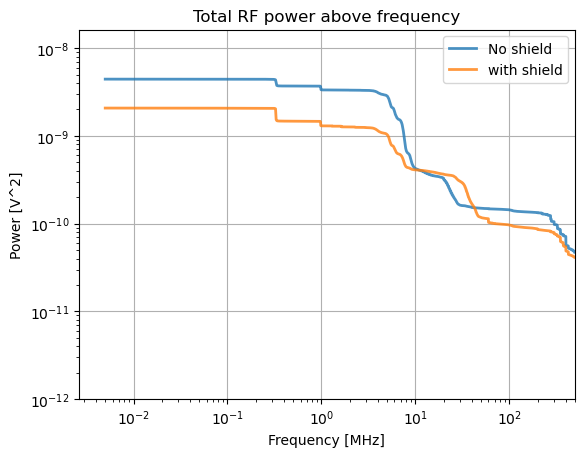

/tmp/ipykernel_215553/311063044.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  xlim(0,500)


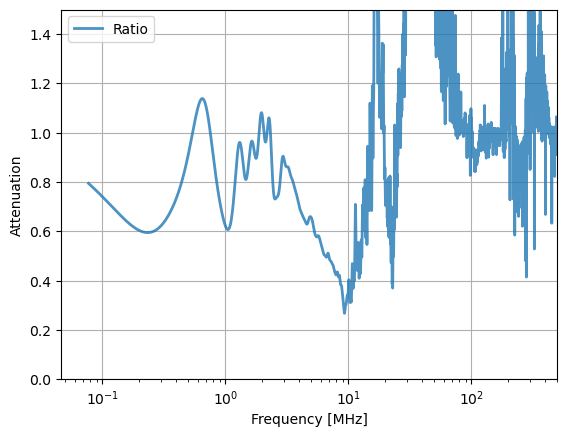

In [186]:
plot(psd_save["freq"][1:]/1e6,power_cumsum_1,linewidth=2,alpha=0.8,label="No shield")
plot(psd_save["freq"][1:]/1e6,power_cumsum_2,linewidth=2,alpha=0.8,label="with shield")
yscale("log")
xscale("log")
xlim(0,500)
ylim(1e-12,)
xlabel("Frequency [MHz]")
ylabel("Power [V^2]")
title("Total RF power above frequency")
legend()
grid()

show()


freq = scipy.ndimage.gaussian_filter(psd_save["freq"][:]/1e6, 20)
att = scipy.ndimage.gaussian_filter(power_2/power_1, 20)
plot(freq,att,linewidth=2,alpha=0.8,label="Ratio")
# yscale("log")
xscale("log")
xlim(0,500)
ylim(0,1.5)
xlabel("Frequency [MHz]")
ylabel("Attenuation")
legend()
grid()